In [1]:
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

In [2]:
def load_data(mode):
    
    if mode == "binary": 
        PATH = "./bidir_dag_lstm_result/binary/test/result.json"    
    elif mode == "multi": 
        PATH = "./bidir_dag_lstm_result/multi/test/result.json"
    elif mode == "randomforest": 
        PATH = "./bidir_dag_lstm_result/random_forest/test/result.json"
        
    print("Getting data length from " + PATH)
    with open(PATH) as f:
        json_file = json.load(f)
    
    answer = json_file["answer"]
    output = json_file["output"]
    tsne = json_file["tsne"]
    return (answer, output, tsne)

In [3]:
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    # print(cm)
    acc = np.trace(cm)/np.sum(cm)
    if not normalize: print("Accuracy: ", acc)

    fig, ax = plt.subplots(figsize=(8,8))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt), fontsize = 18,
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    plt.show
    return ax

In [4]:
# Utility function to visualize the outputs of t-SNE
def tsne_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    
    feature1 = [temp[0] for temp in x]
    feature2 = [temp[1] for temp in x]
    
    sc = ax.scatter(feature1, feature2, lw=0, s=40, c=palette[colors.astype(np.int)])
    
    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=18)
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts
    

### Baseline Model Performance Analysis

##### Binary

In [5]:
binary_answer, binary_output, binary_tsne = load_data("binary")

Getting data length from ./bidir_dag_lstm_result/binary/test/result.json


Confusion matrix, without normalization
Accuracy:  0.8290366350067843


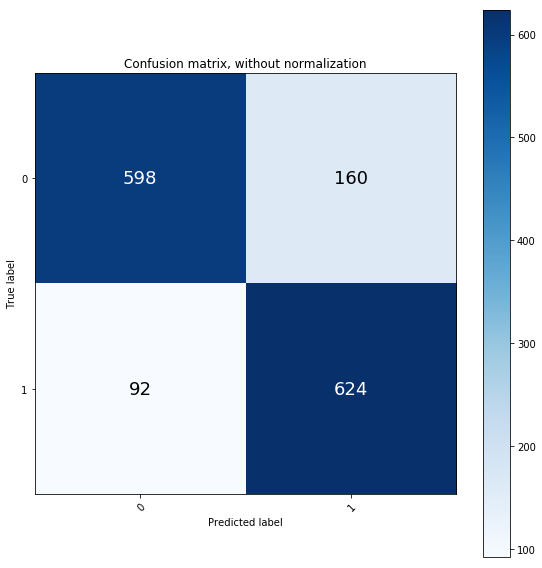

In [6]:
binary_label = np.asarray([0, 1])
plot_confusion_matrix(binary_answer, binary_output, classes=binary_label, normalize=False)

Normalized confusion matrix


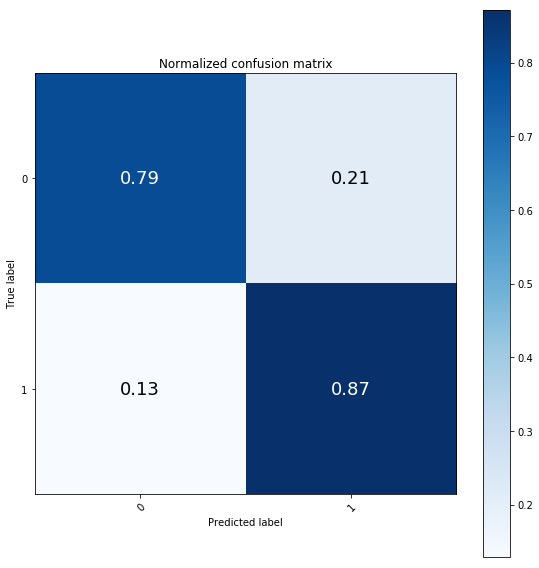

In [7]:
plot_confusion_matrix(binary_answer, binary_output, classes=binary_label, normalize=True)

(<Figure size 576x576 with 1 Axes>,
 [Text(-10.929530620574951, -15.406887531280518, '0'),
  Text(4.37911581993103, 11.658935546875, '1')])

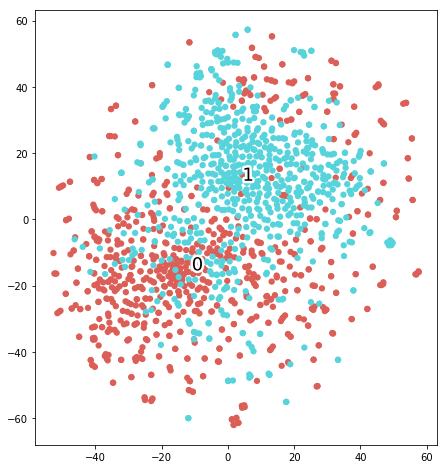

In [8]:
tsne_scatter(np.asarray(binary_tsne), np.asarray(binary_answer))

##### Multi-Classification

In [9]:
multi_answer, multi_output, multi_tsne = load_data("multi")

Getting data length from ./bidir_dag_lstm_result/multi/test/result.json


Confusion matrix, without normalization
Accuracy:  0.6953867028493894


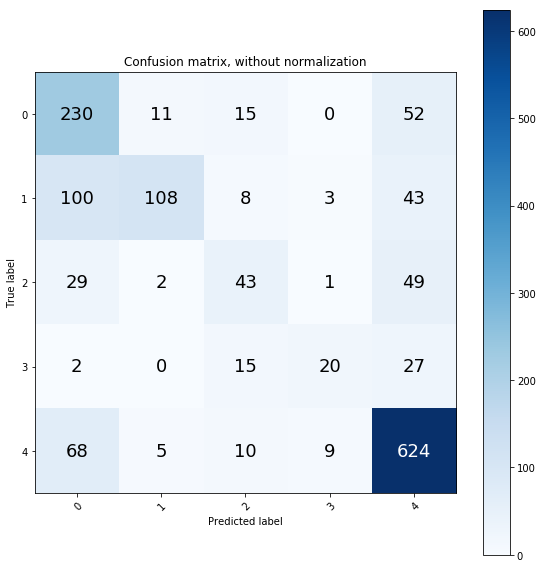

In [10]:
multi_label = np.asarray([0, 1, 2, 3, 4])
plot_confusion_matrix(multi_answer, multi_output, classes=multi_label, normalize=False)

Normalized confusion matrix


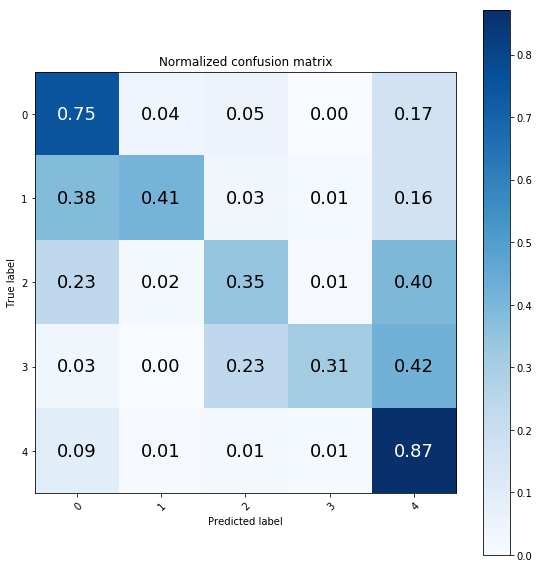

In [11]:
plot_confusion_matrix(multi_answer, multi_output, classes=multi_label, normalize=True)

(<Figure size 576x576 with 1 Axes>,
 [Text(-19.899327278137207, -12.419253826141357, '0'),
  Text(-23.57756233215332, 6.498846054077148, '1'),
  Text(-3.1843563318252563, -12.015621185302734, '2'),
  Text(5.888613224029541, -35.77403450012207, '3'),
  Text(12.827489852905273, 7.088238477706909, '4')])

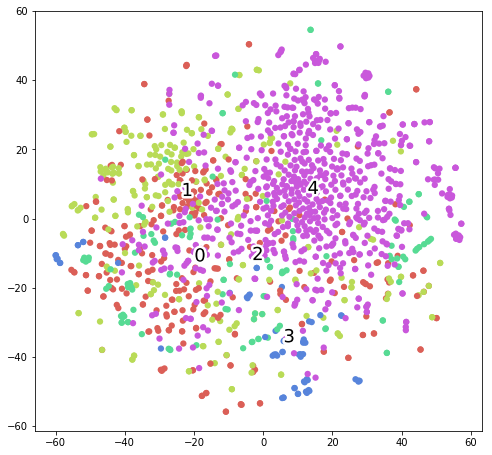

In [12]:
tsne_scatter(np.asarray(multi_tsne), np.asarray(multi_answer))

# Proposed Model Performance Analysis

In [13]:
rf_answer, rf_output, rf_tsne = load_data("randomforest")

Getting data length from ./bidir_dag_lstm_result/random_forest/test/result.json


Confusion matrix, without normalization
Accuracy:  0.10515603799185888


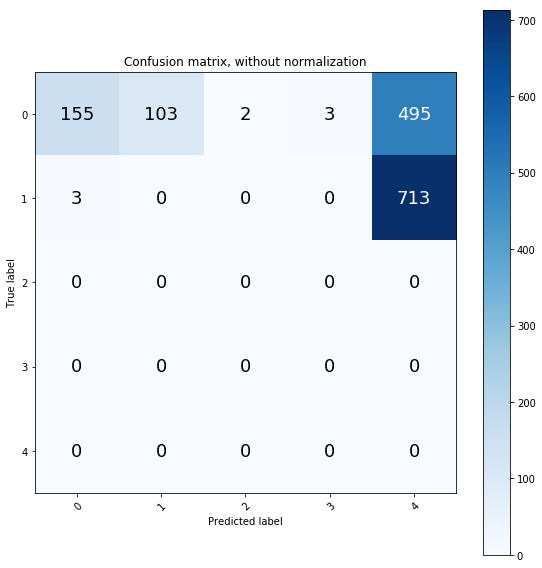

In [14]:
rf_label = np.asarray([0, 1, 2, 3, 4])
plot_confusion_matrix(rf_answer, rf_output, classes=rf_label, normalize=False)

Normalized confusion matrix


C:\Users\jhdan\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide


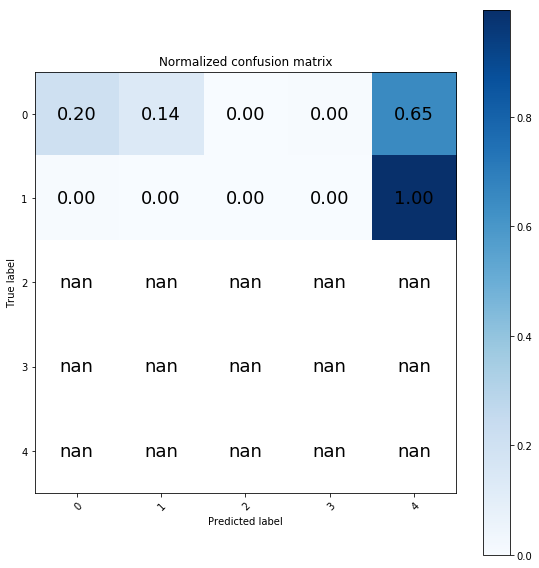

In [15]:
plot_confusion_matrix(rf_answer, rf_output, classes=multi_label, normalize=True)

(<Figure size 576x576 with 1 Axes>,
 [Text(-22.696694374084473, -2.9681705236434937, '0'),
  Text(15.209558486938477, 3.1445811986923218, '1')])

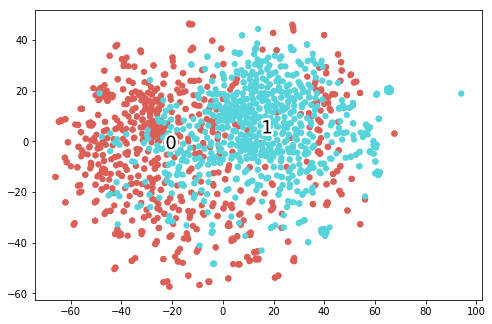

In [16]:
tsne_scatter(np.asarray(rf_tsne), np.asarray(rf_answer))